<br>
<center>
<img src="https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main/assets/img/univasf-logo.png" width=200>
<h3>
    UNIVERSIDADE FEDERAL DO VALE DO SÃO FRANCISCO
    <br>COLEGIADO DE ENGENHARIA DE COMPUTAÇÃO
</h3>

<h3>Orientador</h3>
<span>Prof. Dr. Rosalvo Ferreira de Oliveira Neto</span>

<h3>Discentes</h3>
<span>Anísio Pereira Batista Filho
<br>Edjair Aguiar Gomes Filho
<br>Elayne Rute Lessa Lemos</span>
</center>
<br><br>

## Predição de pedidos com Redes Neurais e Random Forest

Projeto em: [github.com/elaynelemos/prediction-of-orders-dmc](https://github.com/elaynelemos/prediction-of-orders-dmc)

## Data Mining

### Importação das Bibliotecas

In [48]:
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Matplotlib
import matplotlib.pyplot as plt

#Métricas do sklearn:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics
from sklearn.model_selection import KFold

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

### Carregando os dados de treinamento

In [17]:
session_train_X_mean_drop_replacing = pd.read_csv('data/session_train_X_mean_drop_replacing.csv')
session_train_X_mean_replacing = pd.read_csv('data/session_train_X_mean_replacing.csv')
session_train_X_median_replacing = pd.read_csv('data/session_train_X_median_replacing.csv')
session_train_X_min_replacing = pd.read_csv('data/session_train_X_min_replacing.csv')

session_train_y_mean_drop_replacing = pd.read_csv('data/session_train_y_mean_drop_replacing.csv')
session_train_y_mean_replacing = pd.read_csv('data/session_train_y_mean_replacing.csv')
session_train_y_median_replacing = pd.read_csv('data/session_train_y_median_replacing.csv')
session_train_y_min_replacing = pd.read_csv('data/session_train_y_min_replacing.csv')

### Carregando os dados de teste

In [18]:
session_test_X_mean_drop_replacing = pd.read_csv('data/session_test_X_mean_drop_replacing.csv')
session_test_X_mean_replacing = pd.read_csv('data/session_test_X_mean_replacing.csv')
session_test_X_median_replacing = pd.read_csv('data/session_test_X_median_replacing.csv')
session_test_X_min_replacing = pd.read_csv('data/session_test_X_min_replacing.csv')



### Classificador Random Forest

In [ ]:
#Classificador Random Forest
## Para session_train_mean_drop_replacing

#DATA MINING
#RC_mean_drop_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
#RC_mean_drop_replacing.fit(session_train_X_mean_drop_replacing, session_train_y_mean_drop_replacing.order.to_numpy())

#CROSS-VALIDATION
X = session_train_X_mean_drop_replacing
y = session_train_y_mean_drop_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RC_mean_drop_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
    RC_mean_drop_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    #Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RC_mean_drop_replacing.predict(X_test)

    #Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ##Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    #Passo 3: Recuperar os valores da matriz de confusão
    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #Gerando a base de predição:
    #RC_y_pred_mean_drop_replacing = RC_mean_drop_replacing.predict(session_test_X_mean_drop_replacing)

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  1109  1207
0   542  2142
Acuracia: 0.6502
Precisão: 0.6717141126589945
Sensibilidade: 0.4788428324697755
Especificidade: 0.7980625931445604
Área sob a curva ROC: 0.638452712807168


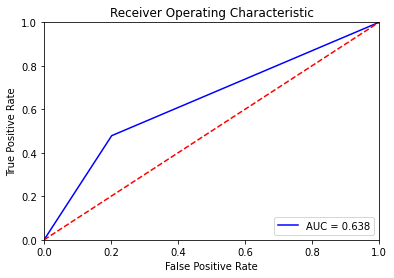

In [57]:
#Classificador Random Forest
## Para session_train_mean_replacing

#DATA MINING
#RC_mean_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
#RC_mean_replacing.fit(session_train_X_mean_replacing, session_train_y_mean_replacing.order.to_numpy())

#CROSS-VALIDATION
X = session_train_X_mean_replacing
y = session_train_y_mean_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RC_mean_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
    RC_mean_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    #Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RC_mean_drop_replacing.predict(X_test)

    #Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ##Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    #Passo 3: Recuperar os valores da matriz de confusão
    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #Gerando a base de predição:
    #RC_y_pred_mean_replacing = RC_mean_replacing.predict(session_test_X_mean_replacing)

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2229    87
0   142  2542
Acuracia: 0.9542
Precisão: 0.9401096583719949
Sensibilidade: 0.9624352331606217
Especificidade: 0.9470938897168405
Área sob a curva ROC: 0.9547645614387311


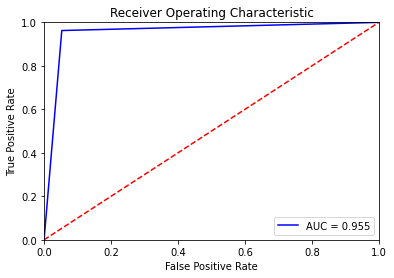

In [34]:
#Classificador Random Forest
## Para session_train_median_replacing

#DATA MINING
#RC_median_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
#RC_median_replacing.fit(session_train_X_median_replacing, session_train_y_median_replacing.order.to_numpy())

    #CROSS-VALIDATION
    X = session_train_X_median_replacing
    y = session_train_y_median_replacing
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RC_median_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
    RC_median_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    #Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RC_mean_drop_replacing.predict(X_test)

    #Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ##Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    #Passo 3: Recuperar os valores da matriz de confusão
    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #Gerando a base de predição:
    #RC_y_pred_median_replacing = RC_median_replacing.predict(session_test_X_median_replacing)

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2130   186
0   301  2383
Acuracia: 0.9026
Precisão: 0.8761826408885233
Sensibilidade: 0.9196891191709845
Especificidade: 0.8878539493293591
Área sob a curva ROC: 0.9037715342501719


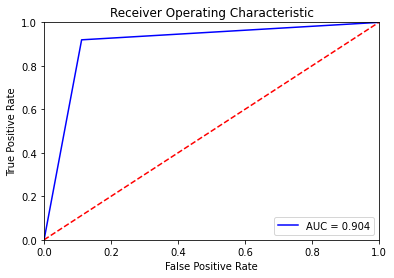

In [35]:
#Classificador Random Forest
## Para session_train_min_replacing

#DATA MINING
#RC_min_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
#RC_min_replacing.fit(session_train_X_min_replacing, session_train_y_min_replacing.order.to_numpy())

#CROSS-VALIDATION
X = session_train_X_min_replacing
y = session_train_y_min_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RC_min_replacing = RandomForestClassifier(n_estimators=100, max_features=10)
    RC_min_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    #Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RC_mean_drop_replacing.predict(X_test)

    #Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ##Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    #Passo 3: Recuperar os valores da matriz de confusão
    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #Gerando a base de predição:
    #RC_y_pred_min_replacing = RC_min_replacing.predict(session_test_X_min_replacing)

### Classificador Rede Neural MLP

### Para session_train_mean_drop_replacing

In [49]:
#Classificador Rede Neural MLP
## Para session_train_min_replacing

# Criar o modelo
input_neuron, hidden_neuron, output_neuron = 8, 3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

In [50]:
# Usar a função summary()
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")

In [55]:
# Treine o modelo
#batch_size = 16
#Log_mean_drop_replacing = mlp.fit(session_train_X_mean_drop_replacing, session_train_y_mean_drop_replacing.order.to_numpy(), batch_size=batch_size, epochs=200)

#CROSS-VALIDATION
X = session_train_X_mean_drop_replacing
y = session_train_y_mean_drop_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#DATA MINING
# Treine o modelo
batch_size = 16
Log_mean_drop_replacing = mlp.fit(X_train, y_train.order.to_numpy(), batch_size=batch_size, epochs=200)


#AVALIAÇÃO
#Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
y_pred = Log_y_pred_mean_drop_replacing.predict(X_test)

#Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)

##Mudandando a ordem para vir primeiro 1 e depois 0
df_cm = df_cm[[1, 0]]
df_cm = df_cm.sort_index( ascending = False )
print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

#Passo 3: Recuperar os valores da matriz de confusão
# Verdadeiro positivo
a = df_cm.iloc[0,0]
# Falso positivo
b = df_cm.iloc[1,0]
# Falso negativo
c = df_cm.iloc[0, 1]
# Verdadeiro negativo
d = df_cm.iloc[1, 1]

##Calculando a acurácia do modelo
acuracia = (a + d) / (a + b + c + d)
print("Acuracia:", acuracia)

##Calculando a precisão do modelo
precisao = a / (a + b)
print("Precisão:", precisao)

##Calculando a sensibilidade do modelo
sensibilidade = a / (a + c)
print("Sensibilidade:", sensibilidade)

##Calculando a especificidade do modelo
especificidade = d / (b + d)
print("Especificidade:", especificidade)

##Calculando a área sob a curva ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("Área sob a curva ROC:", roc_auc)

##Gerando o gráfico da área sob a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Gerando a base de predição:
#Log_y_pred_mean_drop_replacing = Log_mean_drop_replacing.predict(session_test_X_mean_drop_replacing)

Epoch 1/200


ValueError: in user code:

    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\anisi\documents\univasf - engenharia de computação\20.2 - inteligência computacional\projetos\projeto 02\prediction-of-orders-dmc\.virtualenv\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 33)


### Para session_train_mean_replacing

In [ ]:
# Criar o modelo
input_neuron, hidden_neuron, output_neuron = 8, 3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

In [ ]:
# Usar a função summary()
mlp.summary()

In [ ]:
# Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
# Treine o modelo
batch_size = 16
Log_mean_replacing = mlp.fit(session_train_X_mean_replacing, session_train_y_mean_replacing, batch_size=batch_size, epochs=200)

In [ ]:
#AVALIAÇÃO
#Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
Log_y_pred_mean_replacing = Log_mean_replacing.predict(session_test_X_mean_replacing)

#Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
cm = confusion_matrix(TST_Y.prediction.to_numpy(),pred)
df_cm = pd.DataFrame(cm)

##Mudandando a ordem para vir primeiro 1 e depois 0
df_cm = df_cm[[1, 0]]
df_cm = df_cm.sort_index( ascending = False )
print("Matriz de Confusão (linhas = real | colunas = previsto):", df_cm)

#Passo 3: Recuperar os valores da matriz de confusão
# Verdadeiro positivo
a = df_cm.iloc[0,0]
# Falso positivo
b = df_cm.iloc[1,0]
# Falso negativo
c = df_cm.iloc[0, 1]
# Verdadeiro negativo
d = df_cm.iloc[1, 1]

##Calculando a acurácia do modelo
acuracia = (a + d) / (a + b + c + d)
print("Acuracia:", acuracia)

##Calculando a precisão do modelo
precisao = a / (a + b)
print("Precisão:", precisao)

##Calculando a sensibilidade do modelo
sensibilidade = a / (a + c)
print("Sensibilidade:", sensibilidade)

##Calculando a especificidade do modelo
especificidade = d / (b + d)
print("Especificidade:", especificidade)

##Calculando a área sob a curva ROC
roc_auc = roc_auc_score(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
print("Área sob a curva ROC:", roc_auc)

##Gerando o gráfico da área sob a curva ROC
fpr,tpr,_ = metrics.roc_curve(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f ' % roc_auc)
plt.legend(loc = 'lower right ')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Para session_train_median_replacing

In [ ]:
# Criar o modelo
input_neuron, hidden_neuron, output_neuron = 8, 3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

In [ ]:
# Usar a função summary()
mlp.summary()

In [ ]:
# Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
# Treine o modelo
batch_size = 16
Log_median_replacing = mlp.fit(session_train_X_median_replacing, session_train_y_median_replacing, batch_size=batch_size, epochs=200)

In [ ]:
#AVALIAÇÃO
#Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
Log_y_pred_median_replacing = Log_median_replacing.predict(session_test_X_median_replacing)

#Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
cm = confusion_matrix(TST_Y.prediction.to_numpy(),pred)
df_cm = pd.DataFrame(cm)

##Mudandando a ordem para vir primeiro 1 e depois 0
df_cm = df_cm[[1, 0]]
df_cm = df_cm.sort_index( ascending = False )
print("Matriz de Confusão (linhas = real | colunas = previsto):", df_cm)

#Passo 3: Recuperar os valores da matriz de confusão
# Verdadeiro positivo
a = df_cm.iloc[0,0]
# Falso positivo
b = df_cm.iloc[1,0]
# Falso negativo
c = df_cm.iloc[0, 1]
# Verdadeiro negativo
d = df_cm.iloc[1, 1]

##Calculando a acurácia do modelo
acuracia = (a + d) / (a + b + c + d)
print("Acuracia:", acuracia)

##Calculando a precisão do modelo
precisao = a / (a + b)
print("Precisão:", precisao)

##Calculando a sensibilidade do modelo
sensibilidade = a / (a + c)
print("Sensibilidade:", sensibilidade)

##Calculando a especificidade do modelo
especificidade = d / (b + d)
print("Especificidade:", especificidade)

##Calculando a área sob a curva ROC
roc_auc = roc_auc_score(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
print("Área sob a curva ROC:", roc_auc)

##Gerando o gráfico da área sob a curva ROC
fpr,tpr,_ = metrics.roc_curve(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f ' % roc_auc)
plt.legend(loc = 'lower right ')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Para session_train_min_replacing

In [ ]:
# Criar o modelo
input_neuron, hidden_neuron, output_neuron = 8, 3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

In [ ]:
# Usar a função summary()
mlp.summary()

In [ ]:
# Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
# Treine o modelo
batch_size = 16
Log_min_replacing = mlp.fit(session_train_X_min_replacing, session_train_y_min_replacing, batch_size=batch_size, epochs=200)

In [ ]:
#AVALIAÇÃO
#Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
Log_y_pred_min_replacing = Log_min_replacing.predict(session_test_X_min_replacing)

#Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
cm = confusion_matrix(TST_Y.prediction.to_numpy(),pred)
df_cm = pd.DataFrame(cm)

##Mudandando a ordem para vir primeiro 1 e depois 0
df_cm = df_cm[[1, 0]]
df_cm = df_cm.sort_index( ascending = False )
print("Matriz de Confusão (linhas = real | colunas = previsto):", df_cm)

#Passo 3: Recuperar os valores da matriz de confusão
# Verdadeiro positivo
a = df_cm.iloc[0,0]
# Falso positivo
b = df_cm.iloc[1,0]
# Falso negativo
c = df_cm.iloc[0, 1]
# Verdadeiro negativo
d = df_cm.iloc[1, 1]

##Calculando a acurácia do modelo
acuracia = (a + d) / (a + b + c + d)
print("Acuracia:", acuracia)

##Calculando a precisão do modelo
precisao = a / (a + b)
print("Precisão:", precisao)

##Calculando a sensibilidade do modelo
sensibilidade = a / (a + c)
print("Sensibilidade:", sensibilidade)

##Calculando a especificidade do modelo
especificidade = d / (b + d)
print("Especificidade:", especificidade)

##Calculando a área sob a curva ROC
roc_auc = roc_auc_score(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
print("Área sob a curva ROC:", roc_auc)

##Gerando o gráfico da área sob a curva ROC
fpr,tpr,_ = metrics.roc_curve(TST_Y.prediction.to_numpy(), RC_y_pred_mean_drop_replacing)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f ' % roc_auc)
plt.legend(loc = 'lower right ')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()